In [1]:
# Load
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Warning message:
"package 'tm' was built under R version 3.3.2"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.3.2"Warning message:
"package 'SnowballC' was built under R version 3.3.2"Warning message:
"package 'wordcloud' was built under R version 3.3.2"Loading required package: RColorBrewer
Warning message:
"package 'RColorBrewer' was built under R version 3.3.2"

In [20]:
data <- c("F:\\IITC\\ADM\\HW\\HW1\\20news-bydate\\20news-bydate-test\\comp.sys.ibm.pc.hardware","F:\\IITC\\ADM\\HW\\HW1\\20news-bydate\\20news-bydate-test\\comp.sys.mac.hardware","F:\\IITC\\ADM\\HW\\HW1\\20news-bydate\\20news-bydate-test\\sci.electronics", "F:\\IITC\\ADM\\HW\\HW1\\20news-bydate\\20news-bydate-test\\comp.windows.x")

str(data)

 chr [1:4] "F:\\IITC\\ADM\\HW\\HW1\\20news-bydate\\20news-bydate-test\\comp.sys.ibm.pc.hardware" ...


In [21]:
news <- Corpus(DirSource(data, recursive=TRUE),readerControl = list(reader=readPlain))

In [22]:
news

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1565

In [23]:
head(news)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 6

In [24]:
str(news)

List of 1565
 $ 60721:List of 2
  ..$ content: chr [1:16] "From: Mark_Tomlinson@equinox.gen.nz (Mark)" "Subject: COM ports 5-8." "Summary: " "Keywords: " ...
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ datetimestamp: POSIXlt[1:1], format: "2017-02-10 13:42:53"
  .. ..$ description  : chr(0) 
  .. ..$ heading      : chr(0) 
  .. ..$ id           : chr "60721"
  .. ..$ language     : chr "en"
  .. ..$ origin       : chr(0) 
  .. ..- attr(*, "class")= chr "TextDocumentMeta"
  ..- attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"
 $ 60738:List of 2
  ..$ content: chr [1:57] "From: glang@slee01.srl.ford.com (Gordon Lang)" "Subject: Re: IDE Cable" "Organization: Ford Motor Company Research Laboratory" "Lines: 50" ...
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ datetimestamp: POSIXlt[1:1], format: "2017-02-10 13:42:53"
  .. ..$ description  : chr(0) 
  .. ..$ heading      : chr(0) 
  .. ..$ id           : chr "60738"
  .. ..$ language    

In [6]:
tdm <- TermDocumentMatrix(news, control=list(wordLengths=c(4,Inf))) #Term Document Matrix 

#Verify Frequent Terms 
m <- as.matrix(tdm)
 
v <- sort(rowSums(m), decreasing=TRUE) 

d <- data.frame(word = names(v),freq=v) 


head(d, 10)

,word,freq
that,that,2798
with,with,2106
have,have,1950
this,this,1896
subject:,subject:,1648
from:,from:,1594
lines:,lines:,1567
organization:,organization:,1530
from,from,1045
would,would,906


In [7]:
 news <- tm_map(news, removeWords,"Subject") 
 news <- tm_map(news, removeWords,"Organization") 
 news <- tm_map(news, removeWords,"writes") 
 news <- tm_map(news, removeWords,"From") 
 news <- tm_map(news, removeWords,"lines") 
 news <- tm_map(news, removeWords," NNTP-Posting-Host") 
 news <- tm_map(news, removeWords,"article")	


In [8]:
news <- tm_map(news, tolower) ## Convert to Lower Case 

news <- tm_map(news, removeWords, stopwords("english")) ## Remove Stopwords 

news <- tm_map(news, removePunctuation) ## Remove Punctuations 

#news <- tm_map(news, stemDocument) ## Stemming 

news <- tm_map(news, removeNumbers) ## Remove Numbers 

news <- tm_map(news, stripWhitespace) ## Eliminate Extra White Spaces 

news <- tm_map(news , PlainTextDocument)


In [9]:
dtm <- DocumentTermMatrix(news,control=list(wordLengths=c(4,Inf)))
dtm

<<DocumentTermMatrix (documents: 1565, terms: 22955)>>
Non-/sparse entries: 109475/35815100
Sparsity           : 100%
Maximal term length: 106
Weighting          : term frequency (tf)

In [10]:
tdm <- TermDocumentMatrix(news, control=list(wordLengths=c(4,Inf))) #Term Document Matrix 
tdm
#Verify Frequent Terms 
m <- as.matrix(tdm)
 
v <- sort(rowSums(m), decreasing=TRUE) 

d <- data.frame(word = names(v),freq=v) 


head(d, 10)



<<TermDocumentMatrix (terms: 22955, documents: 1565)>>
Non-/sparse entries: 109475/35815100
Sparsity           : 100%
Maximal term length: 106
Weighting          : term frequency (tf)

,word,freq
lines,lines,1568
will,will,905
university,university,762
nntppostinghost,nntppostinghost,715
know,know,646
just,just,640
system,system,613
like,like,574
drive,drive,528
also,also,515


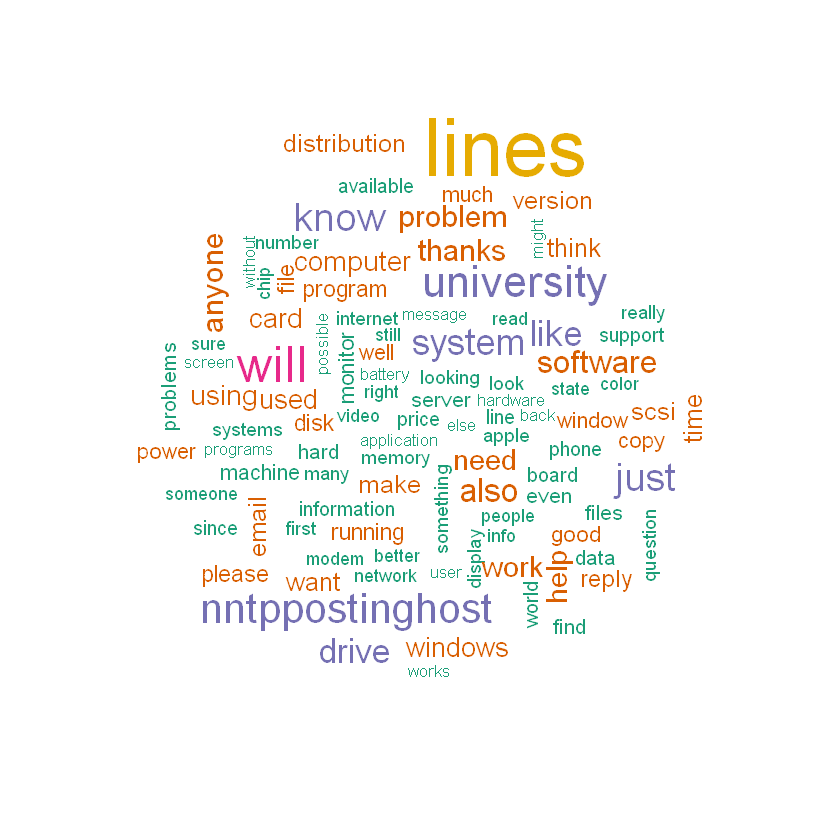

In [11]:
dtms <- removeSparseTerms(dtm, 0.15) # Prepare the data 

freq <- colSums(as.matrix(dtm)) # Find word frequencies 

dark2 <- brewer.pal(6, "Dark2") 

wordcloud(names(freq), freq, max.words=100, rot.per=0.2, colors=dark2)


In [12]:
dtm_tfxidf2<- weightTfIdf(dtm)

In [13]:
dtm_tfxidf2

<<DocumentTermMatrix (documents: 1565, terms: 22955)>>
Non-/sparse entries: 109475/35815100
Sparsity           : 100%
Maximal term length: 106
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

word,freq
character(0),10.544473
character(0),10.241990
character(0),8.800471
character(0),8.401644
character(0),8.127987
character(0),8.121986
character(0),8.064516
character(0),8.020063
character(0),8.002982
character(0),7.934337
